In [5]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
!pip install mtcnn
from mtcnn import MTCNN
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.1 MB/s eta 0:00:00


In [7]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [8]:
# Load Image
image = cv2.imread('celeb.jpg')

In [11]:
len(image)

388

In [12]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

array([[160, 160, 161, ..., 205, 205, 205],
       [160, 160, 161, ..., 205, 205, 205],
       [160, 160, 161, ..., 205, 205, 205],
       ...,
       [ 93,  91,  94, ...,  57,  55,  54],
       [ 94,  91,  94, ...,  54,  53,  52],
       [ 92,  92,  95, ...,  52,  51,  50]], dtype=uint8)
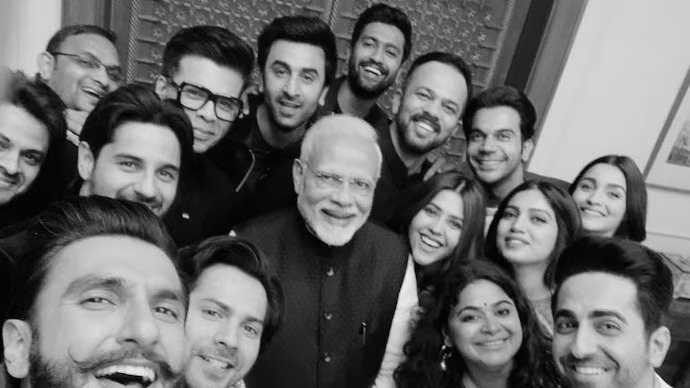

In [13]:
gray_image

In [14]:
# Face Detection using Haar Cascade Classifier
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [15]:
faces

array([[253,  42,  82,  82],
       [347,  21,  65,  65],
       [ 48,  35,  73,  73],
       [458, 111,  65,  65],
       [294, 144,  93,  93],
       [571, 164,  66,  66],
       [ 93, 126, 108, 108],
       [401, 212,  49,  49],
       [488, 189,  73,  73],
       [449, 283,  79,  79],
       [176, 273, 107, 107],
       [ 78, 255, 124, 124],
       [535, 282, 102, 102]], dtype=int32)

In [17]:
# Store face data in a pandas DataFrame
face_data = pd.DataFrame(columns=['x', 'y', 'width', 'height'])
for (x, y, w, h) in faces:
    face_data = face_data.append({'x': x, 'y': y, 'width': w, 'height': h}, ignore_index=True)

<ipython-input-17-20a8161bd313>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  face_data = face_data.append({'x': x, 'y': y, 'width': w, 'height': h}, ignore_index=True)
<ipython-input-17-20a8161bd313>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  face_data = face_data.append({'x': x, 'y': y, 'width': w, 'height': h}, ignore_index=True)
<ipython-input-17-20a8161bd313>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  face_data = face_data.append({'x': x, 'y': y, 'width': w, 'height': h}, ignore_index=True)
<ipython-input-17-20a8161bd313>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  face_data = face_data.append({'x': x, 'y': y, '

In [18]:
face_data.head()

x    y width height
0  253   42    82     82
1  347   21    65     65
2   48   35    73     73
3  458  111    65     65
4  294  144    93     93

In [20]:
face_data.shape

(13, 4)

In [21]:
# Display Result with rectangles using OpenCV
for index, row in face_data.iterrows():
    x, y, w, h = row['x'], row['y'], row['width'], row['height']
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

In [22]:
# Save the result image
cv2.imwrite('result_image.jpg', image)


True

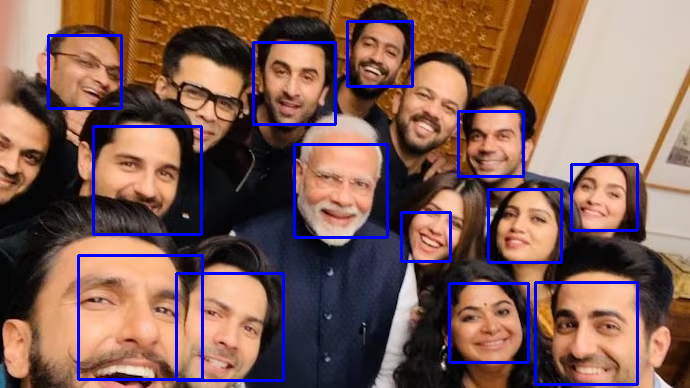

In [28]:
# Install the required module
!pip install opencv-python

# Import the necessary modules
import cv2
from google.colab.patches import cv2_imshow

# Display the result image using OpenCV
cv2_imshow(image)

# Wait for a key press
cv2.waitKey(0)

# Destroy all windows
cv2.destroyAllWindows()

In [32]:
# Print face data
print("Detected Faces:")
print(face_data)

Detected Faces:
      x    y width height
0   253   42    82     82
1   347   21    65     65
2    48   35    73     73
3   458  111    65     65
4   294  144    93     93
5   571  164    66     66
6    93  126   108    108
7   401  212    49     49
8   488  189    73     73
9   449  283    79     79
10  176  273   107    107
11   78  255   124    124
12  535  282   102    102


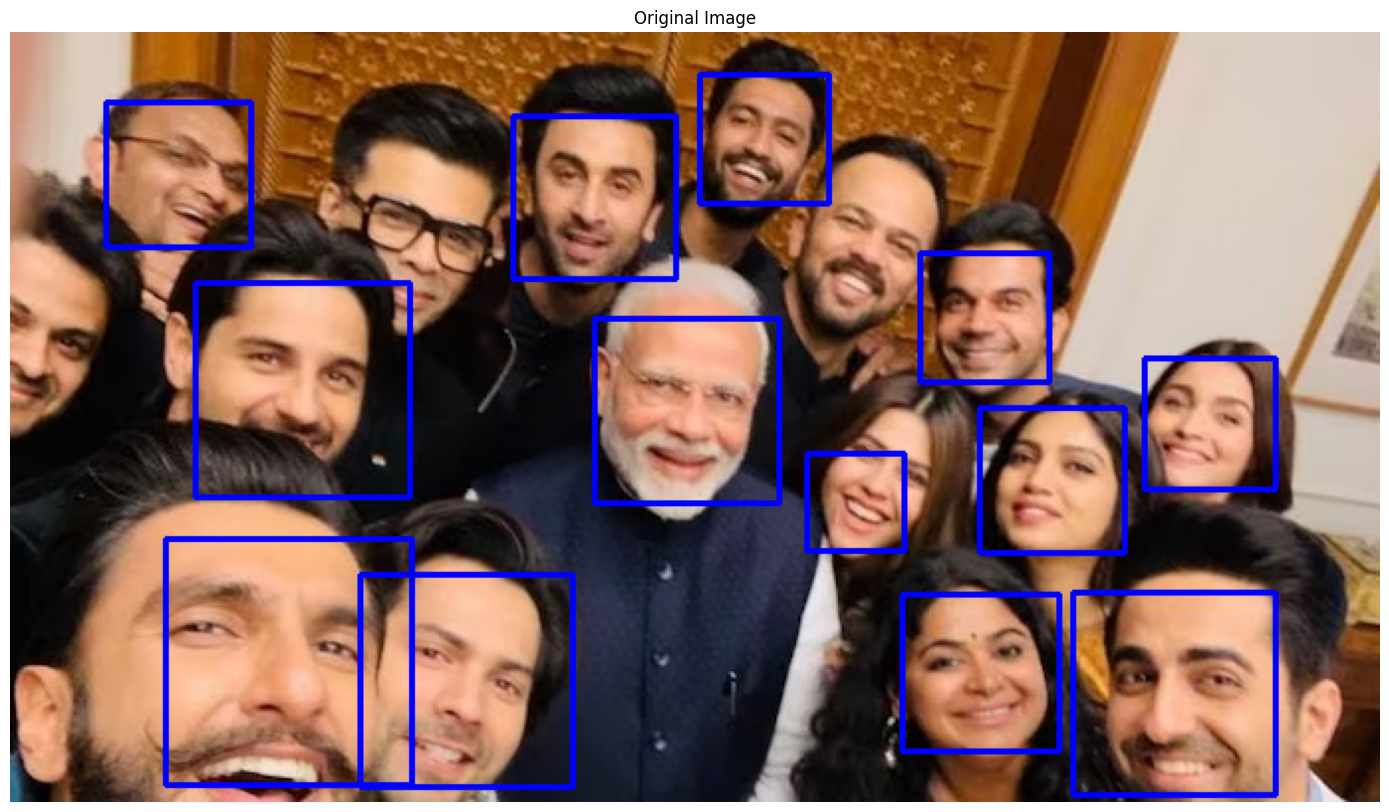

In [33]:
# Display Image using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.show()

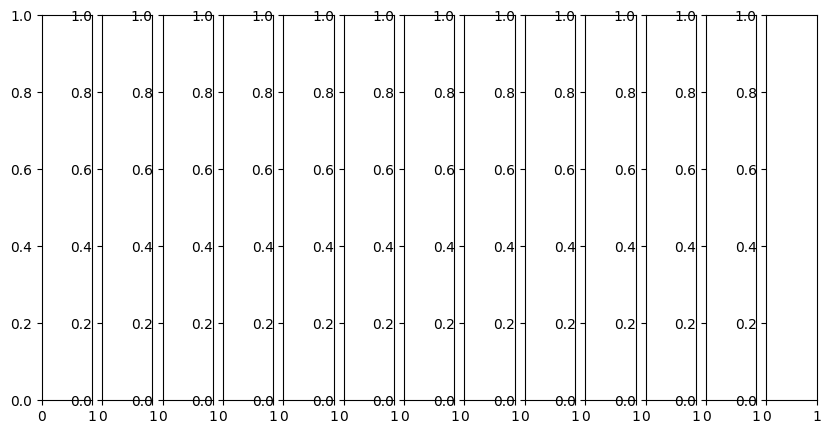

In [34]:
# Convert image of multiple faces to grayscale and display using matplotlib
n = len(faces)
fig, ax = plt.subplots(1, n, figsize=(10, 5))

In [36]:
print(n) # 13 is len of faces

13


In [37]:
for i, (x, y, w, h) in enumerate(faces):
    face_image = gray_image[y:y+h, x:x+w]
    ax[i].imshow(face_image, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'Face {i+1}')

In [39]:
plt.show()

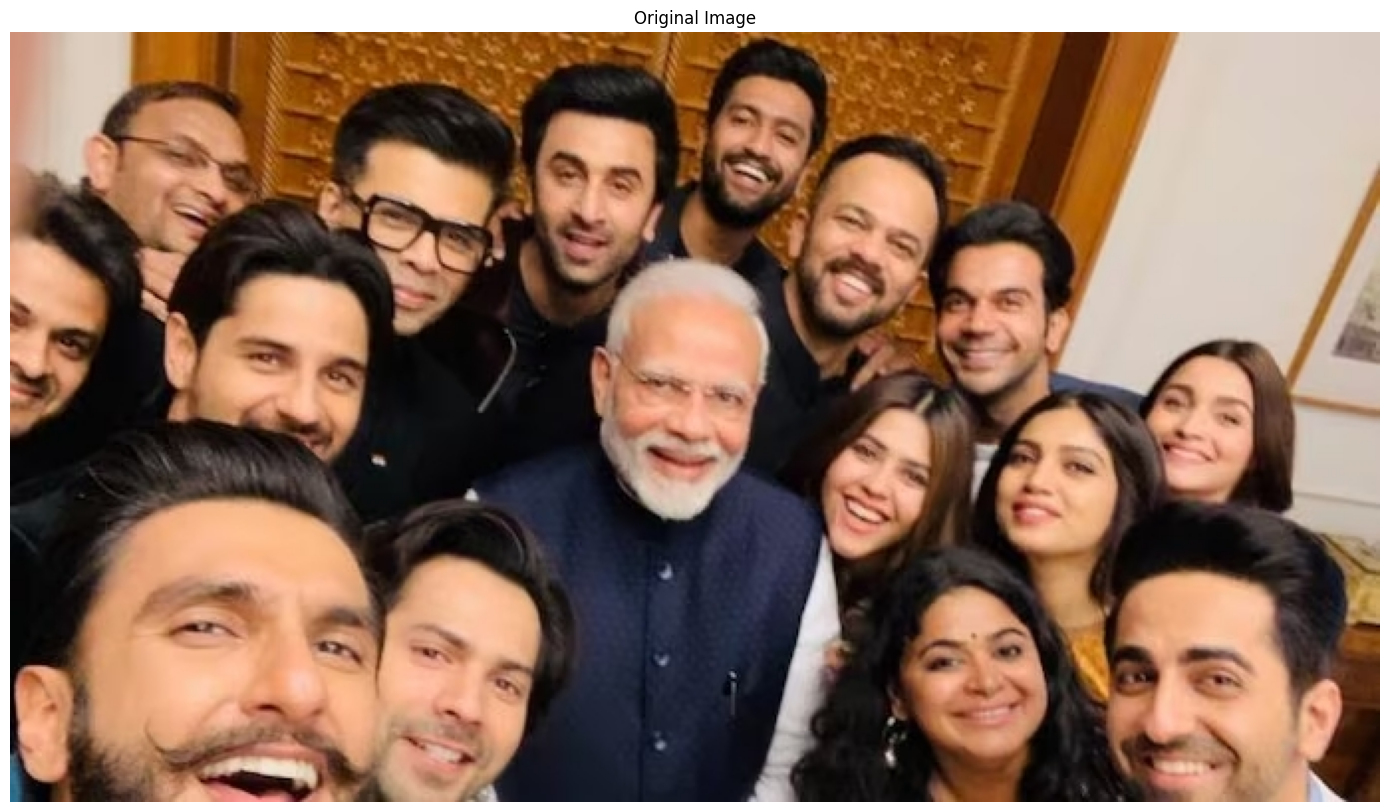

In [51]:
image = cv2.imread('celeb.jpg')

# Display Image using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.show()

In [52]:
# Face Detection using MTCNN
# detector = MTCNN()
# faces_mtcnn = detector.detect_faces(image)
detector = MTCNN()
faces_mtcnn = detector.detect_faces(image)

1/1 [==============================] - 0s 128ms/step


2/2 [==============================] - 0s 9ms/step


Text(0.5, 1.0, 'Face Detection using MTCNN')

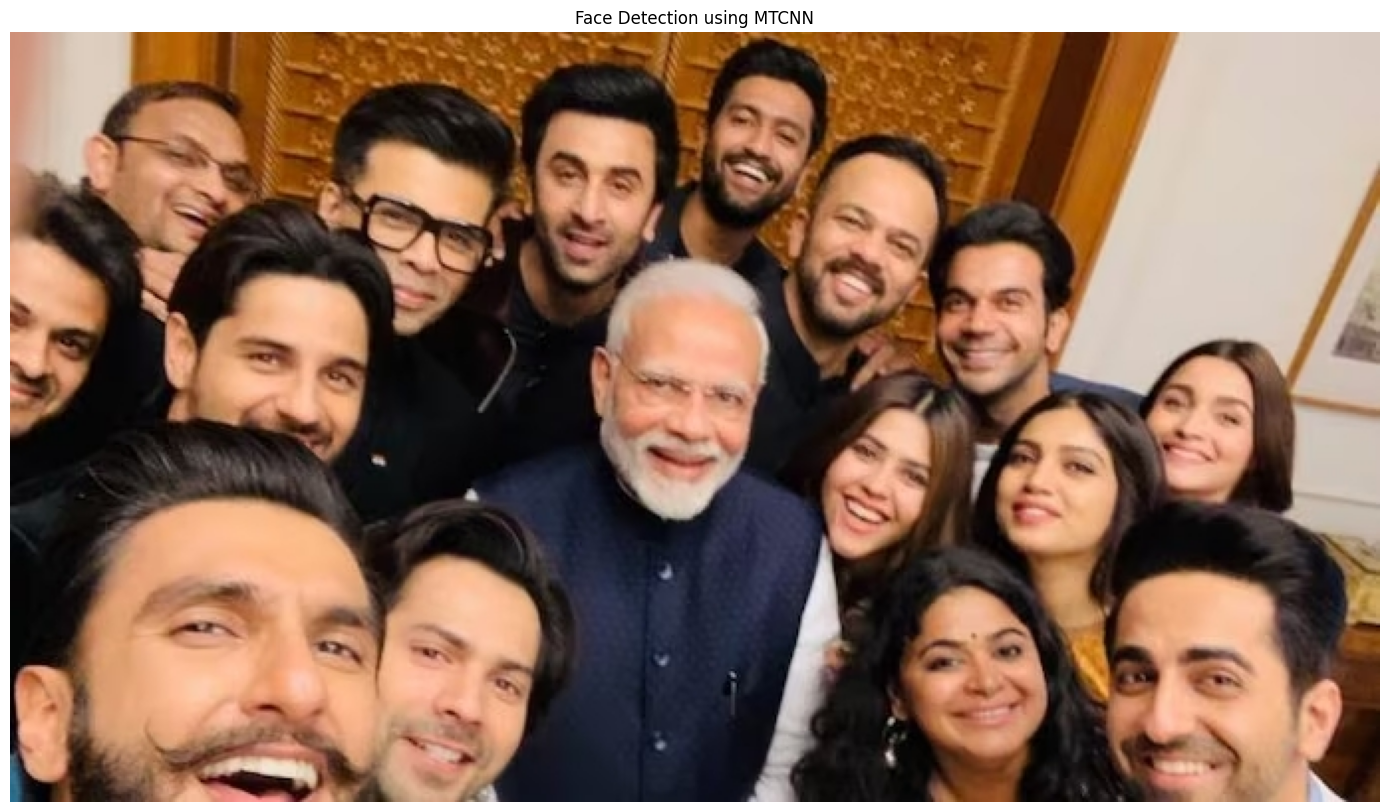

In [57]:
# Annotate the faces detected using MTCNN
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# ax = plt.gca()

fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax.axis('off')
ax.set_title('Face Detection using MTCNN')

In [54]:
# prompt: what is meant by annotating the faces and how the scale is calculated

# Annotating the faces means drawing rectangles around the detected faces in the image. The scale is calculated as the ratio of the width of the rectangle to the width of the image.



Text(0.5, 1.0, 'Face Detection using MTCNN')

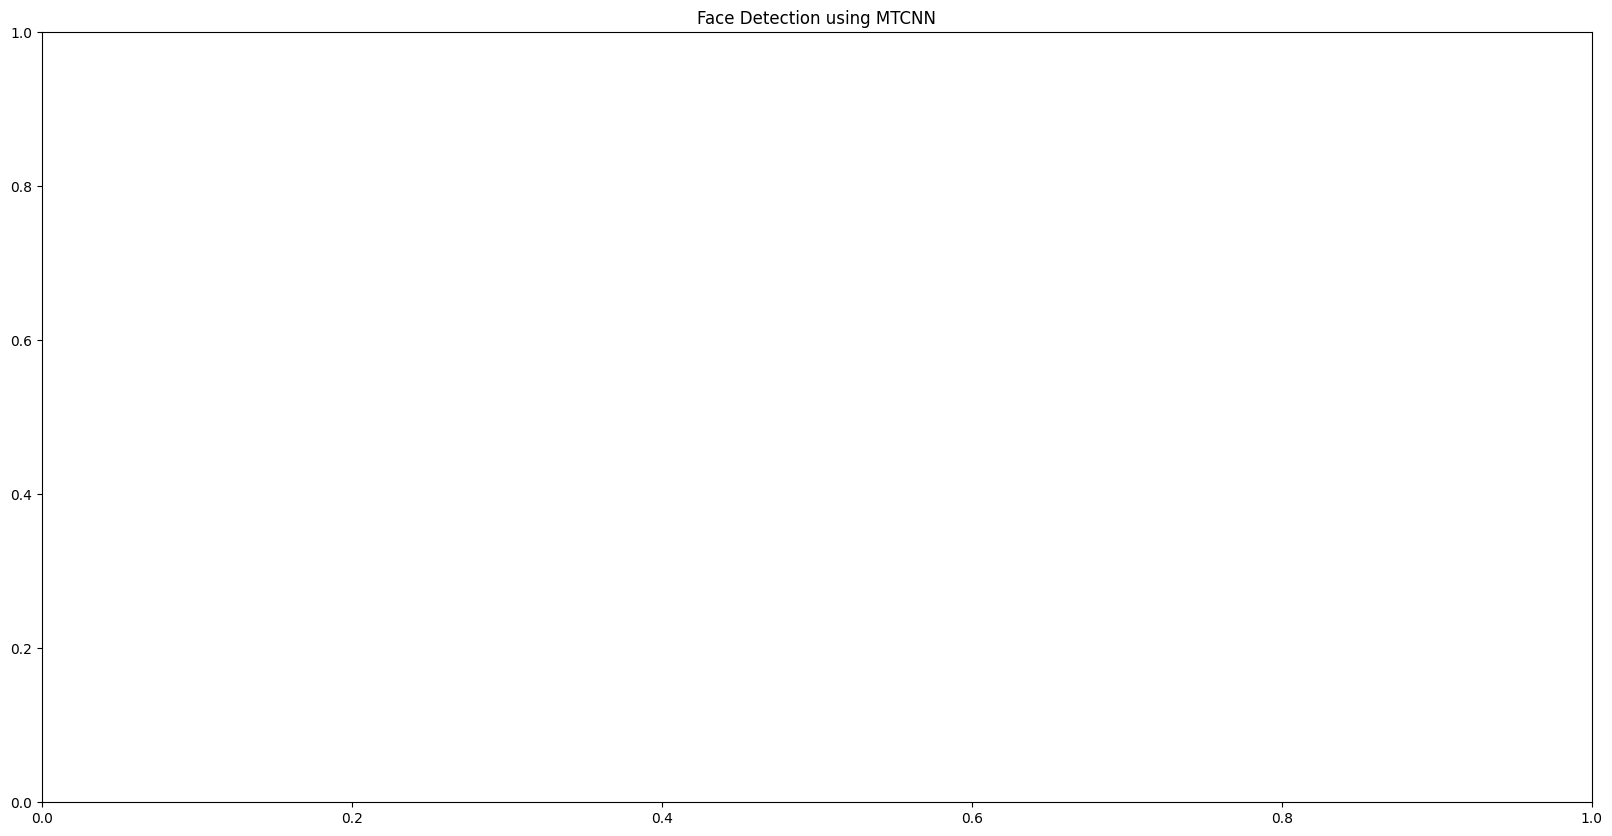

In [80]:
# for result in faces_mtcnn:
#     x, y, width, height = result['box']
#     rect = Rectangle((x, y), width, height, fill=False, color='red')
#     ax.add_patch(rect)

#     for key, value in result['keypoints'].items():
#         dot = Circle(value, radius=2, color='red')
#         ax.add_patch(dot)

# result = cv2.imread('result_image.jpg')

# # Display Image using matplotlib
# plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# plt.axis('off')
# plt.title('Face Detection using MTCNN')
# plt.show()
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from mtcnn import MTCNN
for result in faces_mtcnn:
    x, y, width, height = result['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

    for key, value in result['keypoints'].items():
        dot = Circle(value, radius=2, color='red')
        ax.add_patch(dot)

plt.show()
plt.axis('on')
plt.title('Face Detection using MTCNN')